In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [2]:
peak_one_pca = pd.read_csv("PeakOnePCA-Top13.csv")
peak_two_pca = pd.read_csv("PeakTwoPCA-Top13.csv")

In [3]:
peak_one_pca.head()

,Unnamed: 0,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,1.0,0.470049,-1.643006,1.100909,0.587026,-0.805316,0.768470,-0.149181,-0.309362,-0.233250,-0.044491,0.047819,-0.265938
1,1.0,0.191509,-0.956405,0.645796,0.532535,-0.795081,0.589190,-0.106163,-0.508736,0.118159,0.012459,0.028917,-0.190351
2,1.0,0.184396,-0.221881,0.214302,0.443252,-0.998317,0.514098,-0.110612,-0.561992,0.388088,0.205204,-0.008626,0.333742
3,1.0,0.510831,0.405761,-0.546390,0.035746,-1.461261,0.641250,0.137681,-0.399793,0.244357,0.270168,-0.193970,1.312246
4,1.0,1.159108,-0.994810,-2.351033,-1.346767,-1.266404,0.466911,-2.678716,-0.993609,0.172358,1.622332,2.551777,-0.942003


In [4]:
peak_two_pca.head()

,Unnamed: 0,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,1.0,-0.095072,1.421711,0.356224,-0.522840,-0.980779,0.482560,0.588025,-0.176557,0.265136,-0.304039,-0.041160,-0.000875
1,1.0,-0.242105,0.870094,0.525651,-0.429197,-0.724334,0.582970,0.266375,0.186387,0.034557,0.011494,0.021326,-0.114551
2,1.0,0.169747,0.092069,1.031819,-0.301529,-0.419034,0.499474,-0.091325,0.156074,0.185097,-0.221083,-0.361565,-0.230206
3,1.0,1.225019,-0.273966,2.176873,-0.095278,-0.100730,-0.318464,-0.286875,0.104407,1.147072,0.023152,-0.287559,-0.032270
4,1.0,1.471758,1.251209,4.110791,0.285075,0.039596,-2.200762,-0.569702,-0.265147,2.840100,2.223431,0.223324,0.294677


In [5]:
peak_one_data = peak_one_pca.drop(['Unnamed: 0'], axis = 1).values
peak_two_data = peak_two_pca.drop(['Unnamed: 0'], axis = 1).values

### KMeans Clustering

In [6]:
from sklearn.cluster import KMeans

In [7]:
def elbow_method(data_cl):
    # determine the number of clusters
    #The Elbow method looks at how the total WSS(within cluster sum of squares) varies with the number of clusters.
    wcss = []
    for i in range(1,16):
        km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
        km.fit(data_cl)
        wcss.append(km.inertia_)
    plt.plot(range(1,16),wcss, c="#c51b7d")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.title('Elbow Method', size=15)
    plt.xlabel('Number of clusters', size=15)
    plt.ylabel('wcss', size=15)
    plt.show() 

In [8]:
def train_KMeans(num_clusters, data_cl):
    # number of clusters
    km = KMeans(n_clusters=num_clusters)
    km.fit(data_cl)

    labels = km.predict(data_cl)
    #print(clusters)
    plt.scatter(data_cl[:, 0], data_cl[:, 1], c=labels,
            s=50, cmap='viridis')
    return km, labels

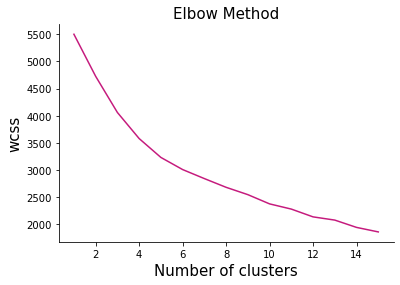

In [9]:
# Peak One 
elbow_method(peak_one_data)
# optimal = 4

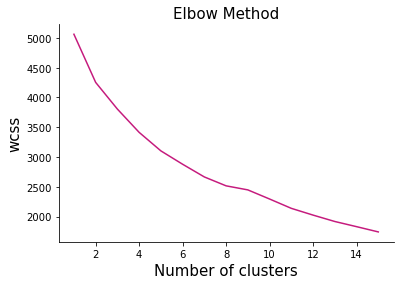

In [10]:
elbow_method(peak_two_data)
# optimal = 4

In [11]:
opt1 = 4
opt2 = 4

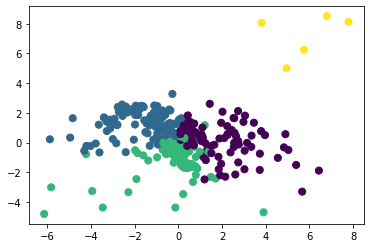

In [12]:
# peak one kmeans clustering
km_one, labels_one = train_KMeans(opt1, peak_one_data)
# 3 clusters seem to be overlapping, one cluster deviates from other clusters but with few data points 

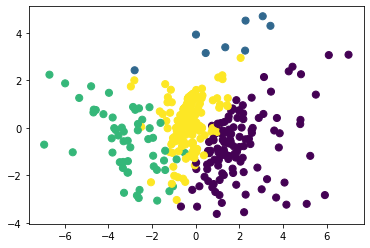

In [13]:
# peak two kmeans clustering
km_two, labels_two = train_KMeans(opt2, peak_two_data)
# peak two clusters are more distributed evenly

In [124]:
#sihouette scores for KMeans
from sklearn.metrics import silhouette_score
def calculate_silhouette_score(X, km):
    score = silhouette_score(X, km.labels_, metric='euclidean')
    print('Silhouetter Score: %.3f' % score)

### Analyze data based on cluster

In [14]:
# get centroids and corresponding index in the original dataset 
def group_data_clusters(data, centroids):
    cluster_dict = {}
    for i in range(len(centroids)):
        lab = centroids[i]
        if lab not in cluster_dict: 
            cluster_dict[lab] = []
        tmp = cluster_dict[lab]
        tmp.append(data[i])
        cluster_dict[lab] = tmp 
    return cluster_dict

In [15]:
df_one = pd.read_csv("OriginalPeakOne.csv")

In [16]:
df_two = pd.read_csv("OriginalPeakTwo.csv")

In [17]:
df_cond_one = pd.read_csv("PeakOneNo-PCA-Scale.csv")
df_cond_two = pd.read_csv("PeakTwoNo-PCA-Scale.csv")

In [18]:
df_one = df_one.drop(['Unnamed: 0'], axis= 1)
df_two = df_two.drop(['Unnamed: 0'], axis = 1)

In [19]:
df_cond_one = df_cond_one.drop(['Unnamed: 0'], axis= 1)
df_cond_two = df_cond_two.drop(['Unnamed: 0'], axis= 1)

In [22]:
general_cols = ['State', 'Age Group', 'Tables Death Rate', 'Population']
cond_cols = ['Adult respiratory distress syndrome',
       'All other conditions and causes (residual)', 'Alzheimer disease',
       'Cardiac arrest', 'Cardiac arrhythmia', 'Cerebrovascular diseases',
       'Chronic lower respiratory diseases', 'Diabetes', 'Heart failure',
       'Hypertensive diseases', 'Influenza and pneumonia',
       'Intentional and unintentional injury, poisoning, and other adverse events',
       'Ischemic heart disease', 'Malignant neoplasms', 'Obesity',
       'Other diseases of the circulatory system',
       'Other diseases of the respiratory system', 'Renal failure',
       'Respiratory arrest', 'Respiratory failure', 'Sepsis',
       'Vascular and unspecified dementia', 'COVID-19 Deaths',
       'Pneumonia Deaths', 'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths']

In [23]:
df_one_general = df_one[general_cols]
df_one_condition_death = df_cond_one[cond_cols]

In [24]:
df_two_general = df_two[general_cols]
df_two_condition_death = df_cond_two[cond_cols]

In [25]:
data_one_general = df_one_general.values
data_two_general = df_two_general.values

In [26]:
data_one_cond = df_one_condition_death.values
data_two_cond = df_two_condition_death.values

In [27]:
cluster_dict_one_general = group_data_clusters(data_one_general , labels_one)
cluster_dict_one_cond = group_data_clusters(data_one_cond  , labels_one)

In [28]:
cluster_dict_two_general = group_data_clusters(data_two_general , labels_two)
cluster_dict_two_cond = group_data_clusters(data_two_cond  , labels_two)

In [29]:
def array_to_list(cluster_dict, i):
    cluster_data = [l.tolist() for l in cluster_dict[i]]
    return cluster_data

In [30]:
def get_different_clusters_data(cluster_dict,num_lst):
    cluster_lst_dict = {}
    for num in num_lst: 
        data_cl = array_to_list(cluster_dict, num)
        cluster_lst_dict[num] = data_cl
    return cluster_lst_dict

In [31]:
# get original data and normalized death conditions based on different clusters in Peak One
general_one_clusters_dict = get_different_clusters_data(cluster_dict_one_general,[0, 1, 2, 3])
cond_one_clusters_dict = get_different_clusters_data(cluster_dict_one_cond,[0, 1, 2, 3])

In [32]:
# get original data and normalized death conditions based on different clusters in Peak Two
general_two_clusters_dict = get_different_clusters_data(cluster_dict_two_general,[0, 1, 2, 3])
cond_two_clusters_dict = get_different_clusters_data(cluster_dict_two_cond,[0, 1, 2, 3])

#### Peak One Data Clusters Pattern

In [33]:
df_gen1_cl1 = pd.DataFrame(general_one_clusters_dict[0], columns = general_cols)
df_gen1_cl2 = pd.DataFrame(general_one_clusters_dict[1], columns = general_cols)
df_gen1_cl3 = pd.DataFrame(general_one_clusters_dict[2], columns = general_cols)
df_gen1_cl4 = pd.DataFrame(general_one_clusters_dict[3], columns = general_cols)

In [34]:
df_cond_cl1 = pd.DataFrame(cond_one_clusters_dict[0], columns = cond_cols)
df_cond_cl2 = pd.DataFrame(cond_one_clusters_dict[1], columns = cond_cols)
df_cond_cl3 = pd.DataFrame(cond_one_clusters_dict[2], columns = cond_cols)
df_cond_cl4 = pd.DataFrame(cond_one_clusters_dict[3], columns = cond_cols)

In [36]:
def plot_top_groups(df, top_n, x_name):
    f1 = sns.catplot(x= x_name, kind="count", palette="ch:.25", data=df[[x_name]], order = df[x_name].value_counts()[:top_n].index)
    f1.set_xticklabels(rotation=40)

def plot_all_clusters_group(df_lst, top_n, x_name):
    # fig, ax = plt.subplots(2,2, figsize=(12,10))
    plot_top_groups(df_lst[0], top_n, x_name)
    plot_top_groups(df_lst[1], top_n, x_name)
    plot_top_groups(df_lst[2], top_n, x_name)
    plot_top_groups(df_lst[3], top_n, x_name)

In [69]:
def violin_plot(col_name1, col_name2, data):
    ax = sns.violinplot(x=col_name1, y=col_name2, data = data)


    plt.show()
    
def plot_death_rate_by_group(lst_df, col_name1, col_name2):
    # fig = plt.figure()
    
    violin_plot(col_name1,col_name2,data= lst_df[0])
    violin_plot(col_name1,col_name2,data= lst_df[1])
    violin_plot(col_name1,col_name2,data= lst_df[2])
    violin_plot(col_name1,col_name2,data= lst_df[3])

In [89]:
def get_top_death_rate_cond(df_cond_cl, top_n):
    # select top n columns based on average death rate for each column
    df1 = df_cond_cl.describe()
    df_t = df1.T
    df_top = df_t.nlargest(top_n, 'mean')
    df_res = df_top.T
    cols = [col for col in df_res.columns]
    df_final = df_cond_cl[cols]
    return df_final 

In [111]:
def hist_top_cond(df): 
    for col in df.columns:
        hist = df[col].hist(bins=10)
        print("Plotting for column {}".format(col))
        plt.show()
        
def plot_death_rate_cond(lst_df, top_n):
    print("Cluster1:")
    top_data1 = get_top_death_rate_cond(lst_df[0], top_n)
    hist_top_cond(top_data1)
    print("Cluster2:")
    top_data2 = get_top_death_rate_cond(lst_df[1], top_n)
    hist_top_cond(top_data2)
    print("Cluster3:")
    top_data3 = get_top_death_rate_cond(lst_df[2], top_n)
    hist_top_cond(top_data3)
    print("Cluster4:")
    top_data4 = get_top_death_rate_cond(lst_df[3], top_n)
    hist_top_cond(top_data4)

In [70]:
x_name0 = "State"
df__gen1_cl_lst = [df_gen1_cl1,df_gen1_cl2, df_gen1_cl3, df_gen1_cl4 ]

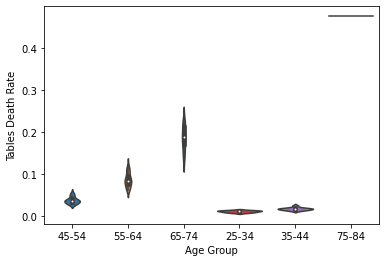

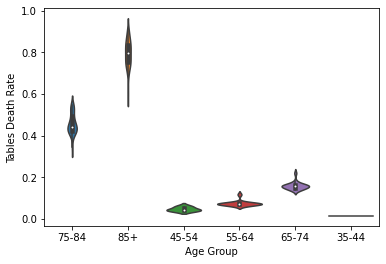

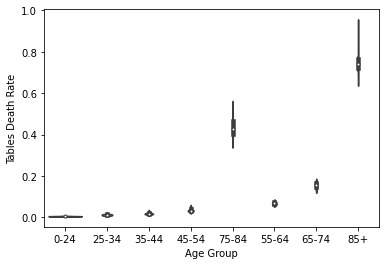

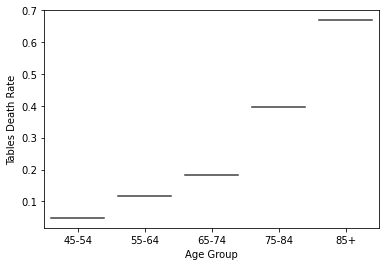

In [71]:
# death rate by age groups
plot_death_rate_by_group(df__gen1_cl_lst, "Age Group", 'Tables Death Rate')

In [107]:
df_cond_cl_lst = [df_cond_cl1, df_cond_cl2, df_cond_cl3, df_cond_cl4]

In [127]:
df_cond_cl1.columns

Index(['Adult respiratory distress syndrome',
       'All other conditions and causes (residual)', 'Alzheimer disease',
       'Cardiac arrest', 'Cardiac arrhythmia', 'Cerebrovascular diseases',
       'Chronic lower respiratory diseases', 'Diabetes', 'Heart failure',
       'Hypertensive diseases', 'Influenza and pneumonia',
       'Intentional and unintentional injury, poisoning, and other adverse events',
       'Ischemic heart disease', 'Malignant neoplasms', 'Obesity',
       'Other diseases of the circulatory system',
       'Other diseases of the respiratory system', 'Renal failure',
       'Respiratory arrest', 'Respiratory failure', 'Sepsis',
       'Vascular and unspecified dementia', 'COVID-19 Deaths',
       'Pneumonia Deaths', 'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths'],
      dtype='object')

Cluster1:
Plotting for column Pneumonia, Influenza, or COVID-19 Deaths


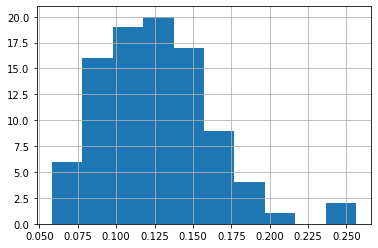

Plotting for column Pneumonia Deaths


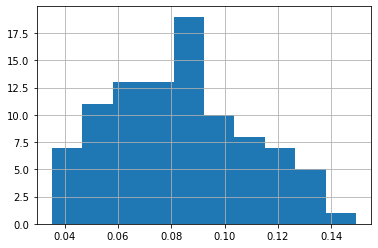

Plotting for column COVID-19 Deaths


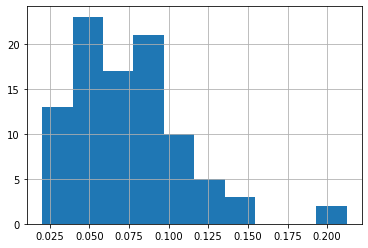

Cluster2:
Plotting for column Pneumonia, Influenza, or COVID-19 Deaths


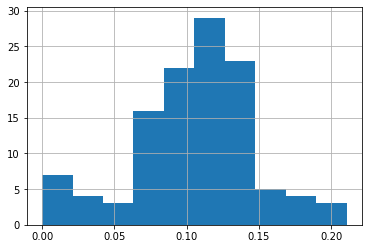

Plotting for column Pneumonia Deaths


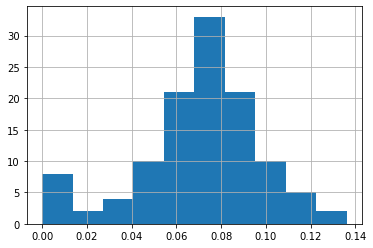

Plotting for column COVID-19 Deaths


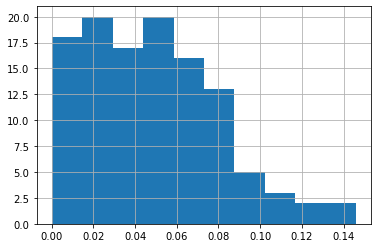

Cluster3:
Plotting for column Pneumonia, Influenza, or COVID-19 Deaths


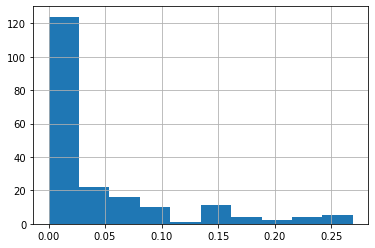

Plotting for column COVID-19 Deaths


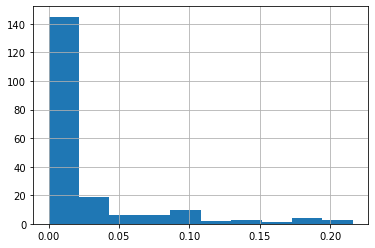

Plotting for column Pneumonia Deaths


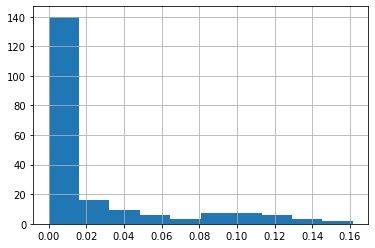

Cluster4:
Plotting for column Pneumonia, Influenza, or COVID-19 Deaths


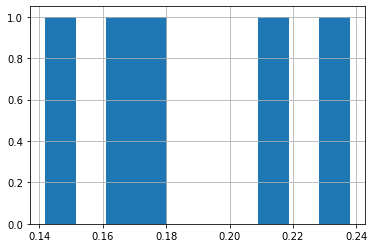

Plotting for column Pneumonia Deaths


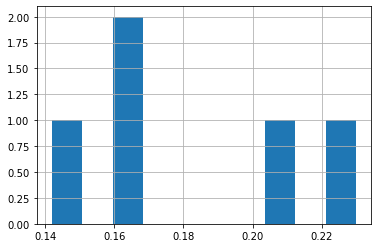

Plotting for column COVID-19 Deaths


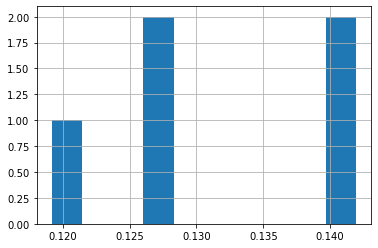

In [112]:
# death condition with top 3 highest death rate in each cluster 
plot_death_rate_cond(df_cond_cl_lst, 3)

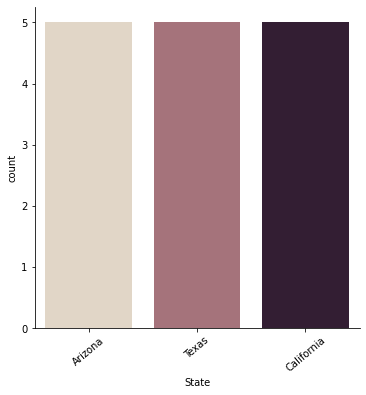

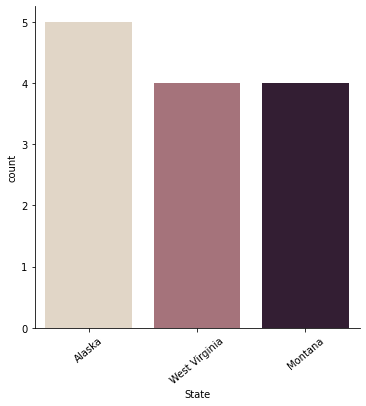

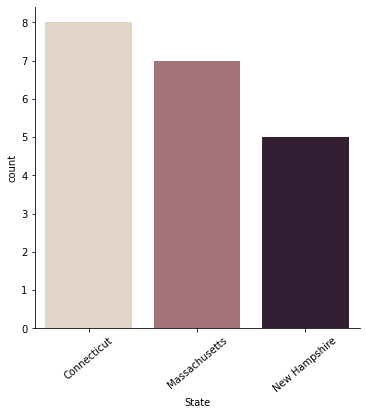

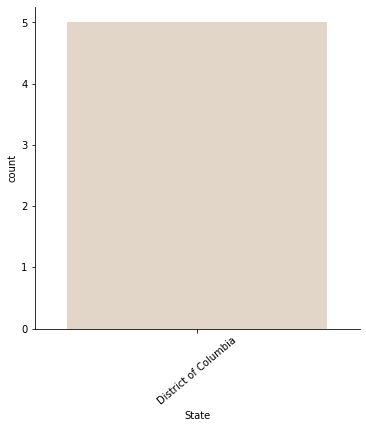

In [118]:
# plot top 3 state groups
plot_all_clusters_group(df__gen1_cl_lst, 3, x_name0)

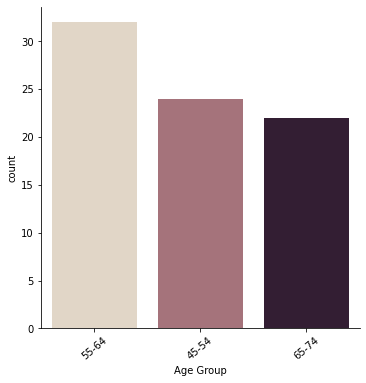

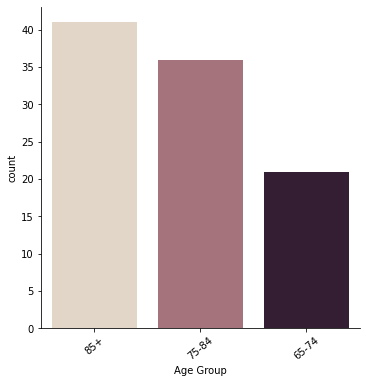

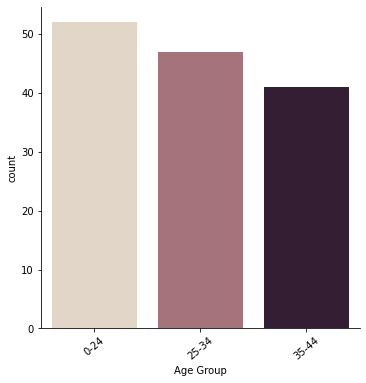

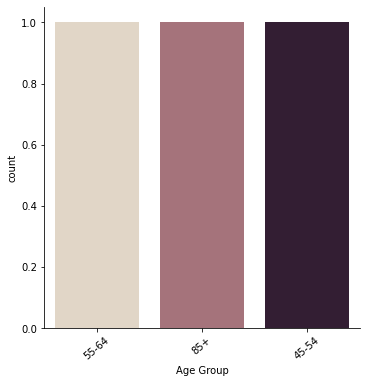

In [121]:
# plot top age group
x_name1 = "Age Group"
df__gen1_cl_lst = [df_gen1_cl1,df_gen1_cl2, df_gen1_cl3, df_gen1_cl4 ]
plot_all_clusters_group(df__gen1_cl_lst, 3, x_name1)

#### Peak Two Data Clusters Pattern

In [113]:
df_gen2_cl1 = pd.DataFrame(general_two_clusters_dict[0], columns = general_cols)
df_gen2_cl2 = pd.DataFrame(general_two_clusters_dict[1], columns = general_cols)
df_gen2_cl3 = pd.DataFrame(general_two_clusters_dict[2], columns = general_cols)
df_gen2_cl4 = pd.DataFrame(general_two_clusters_dict[3], columns = general_cols)

df_cond2_cl1 = pd.DataFrame(cond_two_clusters_dict[0], columns = cond_cols)
df_cond2_cl2 = pd.DataFrame(cond_two_clusters_dict[1], columns = cond_cols)
df_cond2_cl3 = pd.DataFrame(cond_two_clusters_dict[2], columns = cond_cols)
df_cond2_cl4 = pd.DataFrame(cond_two_clusters_dict[3], columns = cond_cols)

In [114]:
df__gen2_cl_lst = [df_gen2_cl1,df_gen2_cl2, df_gen2_cl3, df_gen2_cl4 ]

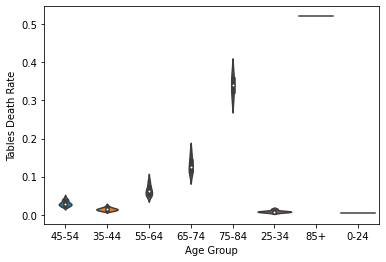

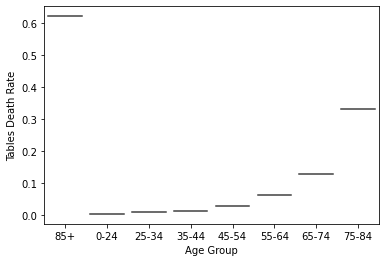

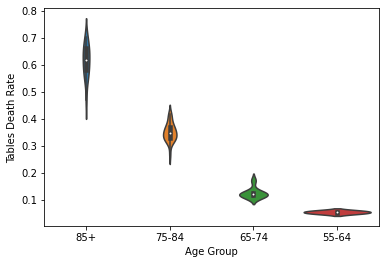

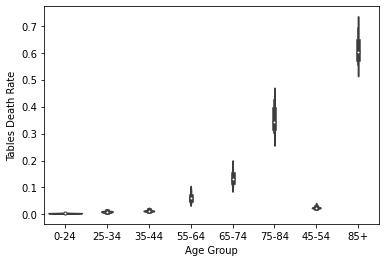

In [115]:
# death rate by age groups
plot_death_rate_by_group(df__gen2_cl_lst, "Age Group", 'Tables Death Rate')

In [116]:
df_cond2_cl_lst = [df_cond2_cl1, df_cond2_cl2, df_cond2_cl3, df_cond2_cl4]

Cluster1:
Plotting for column Pneumonia, Influenza, or COVID-19 Deaths


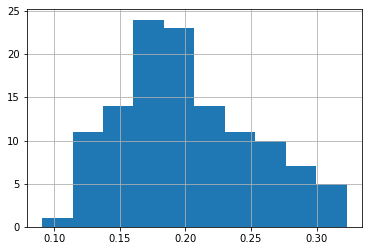

Plotting for column COVID-19 Deaths


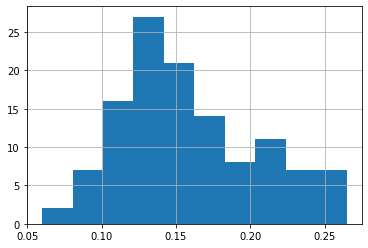

Plotting for column Pneumonia Deaths


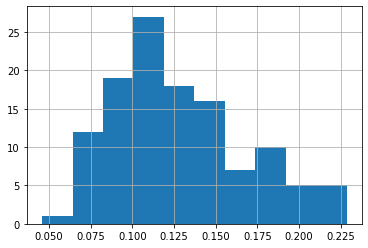

Cluster2:
Plotting for column Pneumonia, Influenza, or COVID-19 Deaths


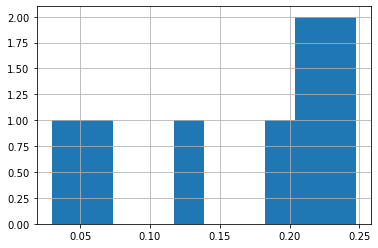

Plotting for column COVID-19 Deaths


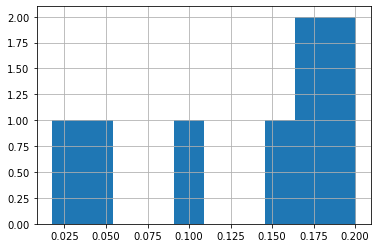

Plotting for column Pneumonia Deaths


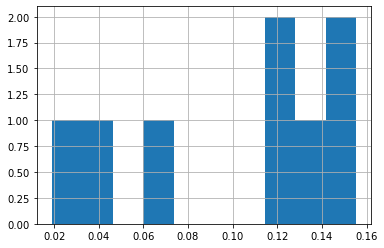

Cluster3:
Plotting for column Pneumonia, Influenza, or COVID-19 Deaths


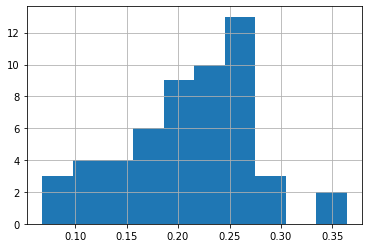

Plotting for column COVID-19 Deaths


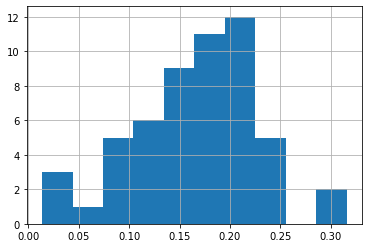

Plotting for column Pneumonia Deaths


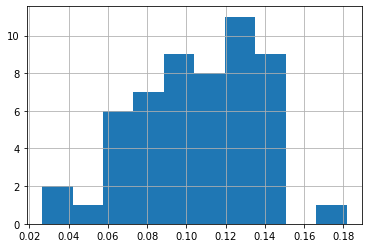

Cluster4:
Plotting for column Pneumonia, Influenza, or COVID-19 Deaths


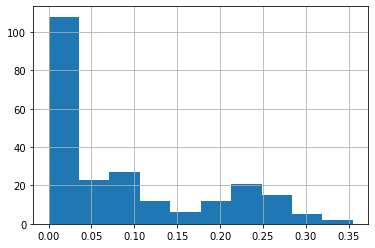

Plotting for column COVID-19 Deaths


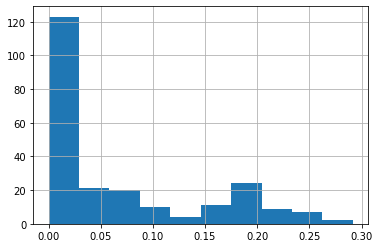

Plotting for column Pneumonia Deaths


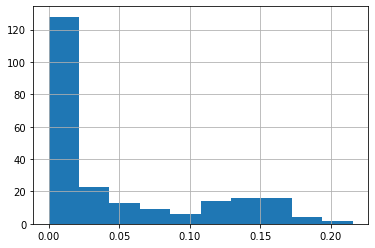

In [117]:
# death condition with top 3 highest death rate in each cluster 
plot_death_rate_cond(df_cond2_cl_lst, 3)

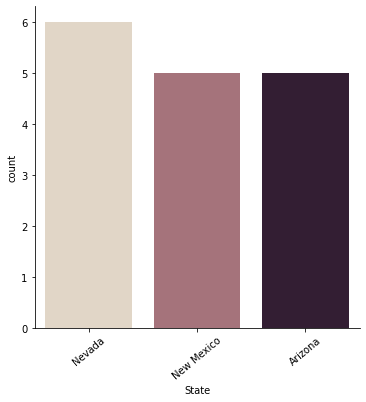

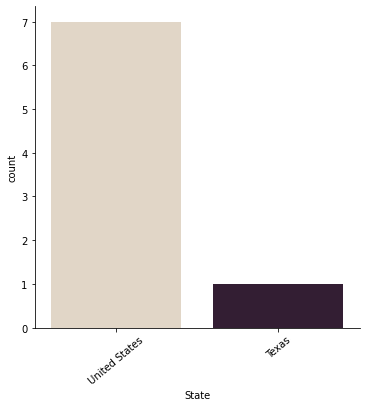

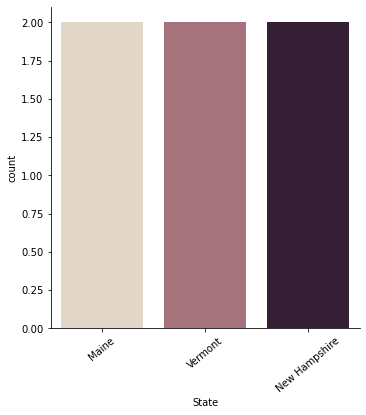

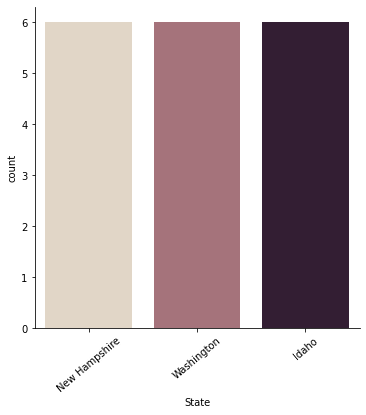

In [119]:
# plot top 3 states 
plot_all_clusters_group(df__gen2_cl_lst, 3, x_name0)

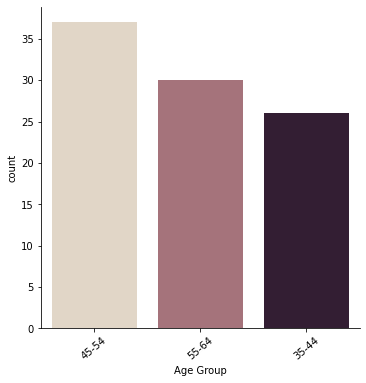

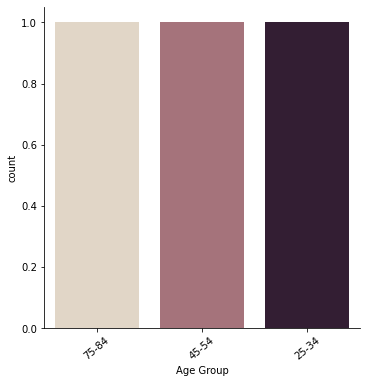

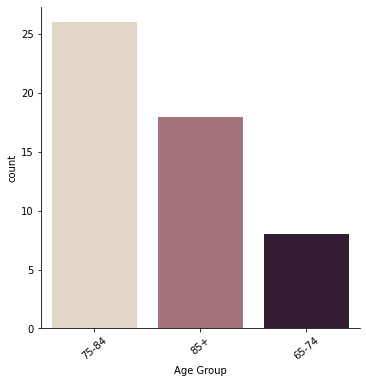

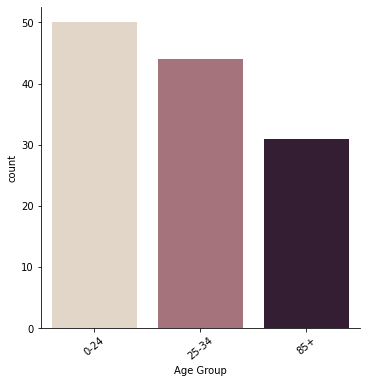

In [122]:
# plot top age group
plot_all_clusters_group(df__gen2_cl_lst, 3, x_name1)